### XGBoost

In [252]:
from numpy import loadtxt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [253]:
url_train = './Dataset/development_dataset.csv'
#url_train = 'itrImputed.csv' #traing dataset
url_dict = './Dataset/Data_Dictionary.xlsx' #data dictionary
#url_lead = 'itrImputedlead.csv' 
url_lead = './Dataset/Evaluation_dataset.csv'

In [254]:
## making dataframe
#df_raw = pd.read_csv(url_raw)
df_train = pd.read_csv(url_train)
df_dict = pd.read_excel(url_dict)
df_lead = pd.read_csv(url_lead)
#df_lead_raw = pd.read_csv(url_lead_raw)

In [255]:
df_train = df_train.replace(to_replace = '.', value =np.nan)
df_lead = df_lead.replace(to_replace = '.', value =np.nan)

In [256]:
#df_train = df_train.iloc[:,1:]
df_train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,...,100.083403,1.0,1,1.0,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,...,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,...,210.175146,10.0,1,10.0,1.044599,NaN,0,0,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,...,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,...,210.175146,NaN,NaN,NaN,1.558341,NaN,1,0,101.268503,High


In [257]:
lead_key = df_lead['VAR1'].tolist()
#print(lead_key)

In [258]:
#df_lead = df_lead.iloc[:,1:]
df_lead.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20
0,1,984.705882,0.005556,35.714286,611.574748,3.454545,0.559710,196.911295,22.086661,47.899686,0.126123,NaN,6.666667,1,6.666667,0.959315,NaN,0,1,99.032702
1,2,815.294118,0.333333,392.857143,638.878239,9.090909,1.738398,199.830468,NaN,58.632548,1.192628,50.041701,9.333333,1,10.000000,1.949250,NaN,1,0,82.507745
2,3,872.941177,0.138889,714.285714,611.574748,8.181818,0.746660,197.352191,22.086661,NaN,6.295772,15.012510,6.733333,1,6.733333,1.122608,1000.0,0,1,0.000000
3,4,942.352941,1.051189,NaN,651.420058,72.727273,100.909504,344.554996,NaN,48.976192,0.162852,50.041701,13.333333,5,13.333333,63.597146,NaN,0,1,400.672978
4,5,983.529412,4.444444,NaN,611.606260,13.636364,0.562581,196.915589,57.738459,58.632548,12.885369,340.283570,23.333333,3,23.333333,0.961071,NaN,0,0,99.685026


#### Dropping features

In [259]:
drop_list1 = ['VAR14','VAR17']
drop_list2 = ['VAR19','VAR18']
drop_list3 = ['VAR10'] #17 14 

In [262]:
df_train = df_train.drop(drop_list1,axis=1)
df_lead = df_lead.drop(drop_list1,axis=1)

In [263]:
df_train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR11,VAR12,VAR13,VAR15,VAR16,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,0.279273,100.083403,1.0,1.0,1.540594,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,15.012510,NaN,NaN,1.614613,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,0.453212,210.175146,10.0,10.0,1.044599,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,NaN,NaN,NaN,NaN,1.145729,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,NaN,210.175146,NaN,NaN,1.558341,101.268503,High


In [264]:
df_lead.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR11,VAR12,VAR13,VAR15,VAR16,VAR20
0,1,984.705882,0.005556,35.714286,611.574748,3.454545,0.559710,196.911295,22.086661,0.126123,NaN,6.666667,6.666667,0.959315,99.032702
1,2,815.294118,0.333333,392.857143,638.878239,9.090909,1.738398,199.830468,NaN,1.192628,50.041701,9.333333,10.000000,1.949250,82.507745
2,3,872.941177,0.138889,714.285714,611.574748,8.181818,0.746660,197.352191,22.086661,6.295772,15.012510,6.733333,6.733333,1.122608,0.000000
3,4,942.352941,1.051189,NaN,651.420058,72.727273,100.909504,344.554996,NaN,0.162852,50.041701,13.333333,13.333333,63.597146,400.672978
4,5,983.529412,4.444444,NaN,611.606260,13.636364,0.562581,196.915589,57.738459,12.885369,340.283570,23.333333,23.333333,0.961071,99.685026


#### Hyper Parameter Tuning

In [265]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

target = 'VAR21'
IDcol = 'VAR1'

In [266]:
train = df_train
train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR11,VAR12,VAR13,VAR15,VAR16,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,0.279273,100.083403,1.0,1.0,1.540594,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,15.012510,NaN,NaN,1.614613,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,0.453212,210.175146,10.0,10.0,1.044599,98.249570,Medium
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,NaN,NaN,NaN,NaN,1.145729,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,NaN,210.175146,NaN,NaN,1.558341,101.268503,High


In [267]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_yh = LabelEncoder()
#labelencoder_xh = LabelEncoder()
train.iloc[:,-1] = labelencoder_yh.fit_transform(train.iloc[:,-1].values)

In [268]:
train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR11,VAR12,VAR13,VAR15,VAR16,VAR20,VAR21
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,0.279273,100.083403,1.0,1.0,1.540594,100.104991,1
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,15.012510,NaN,NaN,1.614613,146.654045,0
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,0.453212,210.175146,10.0,10.0,1.044599,98.249570,2
3,4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,NaN,NaN,NaN,NaN,1.145729,140.862306,1
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,NaN,210.175146,NaN,NaN,1.558341,101.268503,0


In [269]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgb_param['num_class'] = 3
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='merror', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    #feat_imp = pd.Series(alg.feature_importances_, index = predictors)
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [270]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=700,
 max_depth=9,
 min_child_weight=1,
 gamma=0.3,
 subsample=1,
 colsample_bytree=1,
 reg_alpha=0,
 reg_lambda = 1,
 objective= 'multi:softmax',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

#predictors


Model Report
Accuracy : 0.7296


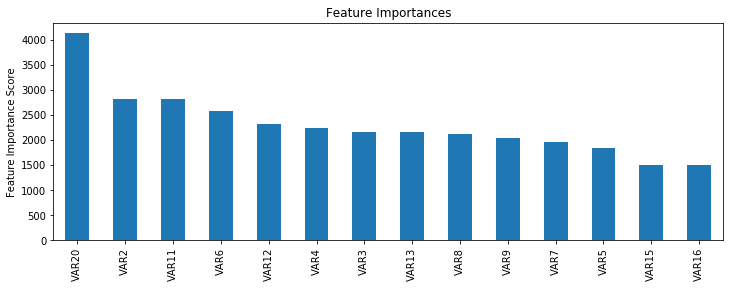

In [271]:
modelfit(xgb1, train, predictors)

#### Leaderboard Prediction (Tuned XGBoost)

In [272]:
lead = df_lead
lead_predictors = [x for x in lead.columns if x not in [IDcol]]
#lead_predictors

In [273]:
lead_predictions = xgb1.predict(lead[predictors])

In [274]:
dlead = lead_predictions.tolist()
len(lead_key), len(dlead)

(10000, 10000)

In [275]:
dylead1 = labelencoder_yh.inverse_transform(lead_predictions)
dylead1

array(['Medium', 'Medium', 'Medium', ..., 'Low', 'Medium', 'Low'],
      dtype=object)

Text(0, 0.5, 'Frequency')

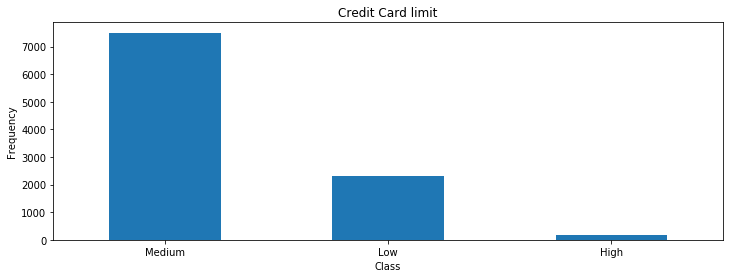

In [276]:
n_count_classes = pd.value_counts(dylead1, sort = True)
n_count_classes.plot(kind = 'bar', rot=0)
plt.title("Credit Card limit")
#plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [277]:
ddfxyz = pd.DataFrame(dylead1,lead_key)
ddfxyz.head()

,0
1,Medium
2,Medium
3,Medium
4,Medium
5,Medium


In [278]:
ddfxyz.to_csv('Anonymous_IITRoorkee.csv',header=False)

#### Grid Search

#### Tune max_depth & min_child_weight

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1_micro', n_jobs=4,iid=False, cv=5)

gsearch1.fit(train[predictors],train[target])

In [ ]:
gsr = pd.DataFrame(gsearch1.cv_results_)
gsr

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2 = {
 'max_depth':[5,6,7],
 'min_child_weight':[1,2,3,4]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=1000, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1_micro',n_jobs=4,iid=False, cv=5)

gsearch2.fit(train[predictors],train[target])

In [ ]:
gsr2 = pd.DataFrame(gsearch2.cv_results_)
gsr2.head()

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

#### Tuning gamma

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}

gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='f1_micro',n_jobs=4,iid=False, cv=5)

gsearch3.fit(train[predictors],train[target])

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

In [ ]:
gsr3 = pd.DataFrame(gsearch3.cv_results_)
gsr3.head()

In [ ]:
param_test4 = {
 'gamma':[0.22,0.25]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=2, gamma=0.25, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='f1_micro',n_jobs=4,iid=False, cv=5)

gsearch4.fit(train[predictors],train[target])

In [ ]:
gsearch4.best_params_, gsearch4.best_score_

#### Tune Learning Rate

In [ ]:
param_test5 = {
 'learning_rate':[0.1,0.09]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=2, gamma=0.25, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='f1_micro',n_jobs=4,iid=False, cv=5)

gsearch5.fit(train[predictors],train[target])

In [ ]:
gsearch5.best_params_, gsearch5.best_score_

#### Tune n_estimators

In [ ]:
param_test6 = {
 'subsample':[0.7,0.8,0.9],
 'colsample_bytree':[0.7,0.8,3,0.9]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=1000, max_depth=8,
 min_child_weight=2, gamma=0.3, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softmax', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='f1_micro',n_jobs=4,iid=False, cv=5)

gsearch6.fit(train[predictors],train[target])